In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import optical_gating_analysis as OG
import hrv_analysis as hrv

import glob

In [2]:
oogs3 = []
sequence_src = r"E:\data\my data\June 2024 imaging\Day1 variability healthy 30mins\third fish\2024-06-19 17.16.57 vid\Allied Vision Technologies GS650 0001f61c\*tif"
file_list = sorted(glob.glob(sequence_src))
for file in tqdm(file_list):
    oog = OG.BasicOpticalGating()
    oog.settings["progress_bars"] = False
    oog.settings["show_status"] = False
    oog.sequence_manager.set_source(file)
    oog.run()
    oogs3.append(oog)

100%|██████████| 225/225 [08:32<00:00,  2.28s/it]


In [3]:
oogs4 = []
sequence_src = r"E:\data\my data\June 2024 imaging\Day1 variability healthy 30mins\fourth fish\2024-06-19 17.52.37 vid\Allied Vision Technologies GS650 0001f61c\*tif"
file_list = sorted(glob.glob(sequence_src))
for file in tqdm(file_list):
    oog = OG.BasicOpticalGating()
    oog.settings["progress_bars"] = False
    oog.settings["show_status"] = False
    oog.sequence_manager.set_source(file)
    oog.run()
    oogs4.append(oog)

100%|██████████| 221/221 [08:19<00:00,  2.26s/it]


In [4]:
oogs2 = []
sequence_src = r"E:\data\my data\June 2024 imaging\Day1 variability healthy 30mins\second fish\2024-06-19 16.39.55 vid\Allied Vision Technologies GS650 0001f61c\*tif"
file_list = sorted(glob.glob(sequence_src))
for file in tqdm(file_list):
    oog = OG.BasicOpticalGating()
    oog.settings["progress_bars"] = False
    oog.settings["show_status"] = False
    oog.sequence_manager.set_source(file)
    oog.run()
    oogs2.append(oog)

100%|██████████| 219/219 [06:24<00:00,  1.75s/it]


In [9]:
periods2 = []
for oog2 in oogs2:
    periods2.append(oog2.sequence_manager.reference_period)

periods3 = []
for oog3 in oogs3:
    periods3.append(oog3.sequence_manager.reference_period)

periods4 = []
for oog4 in oogs4:
    periods4.append(oog4.sequence_manager.reference_period)

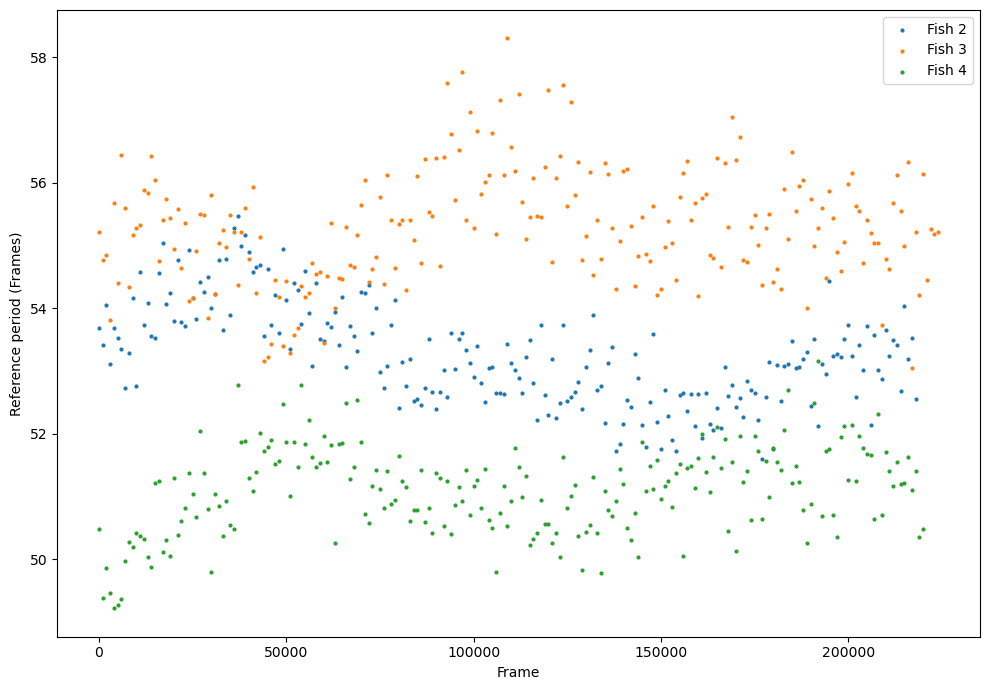

In [33]:
plt.figure(figsize = (10,7))
plt.scatter(np.arange(len(periods2)) * 1000, periods2, s = 4, label = "Fish 2")
plt.scatter(np.arange(len(periods3)) * 1000, periods3, s = 4, label = "Fish 3")
plt.scatter(np.arange(len(periods4)) * 1000, periods4, s = 4, label = "Fish 4")
plt.xlabel("Frame")
plt.ylabel("Reference period (Frames)")
plt.legend()
plt.tight_layout()
plt.show()

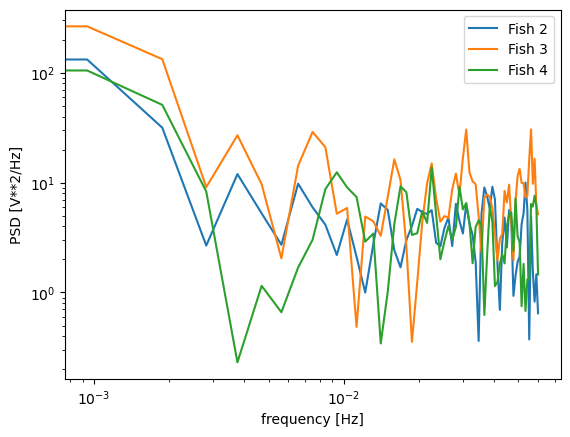

In [32]:
from scipy import signal
f, Pxx = signal.welch(periods2, fs=1/(1000/120), nperseg = 128)
plt.semilogy(f, Pxx, label = "Fish 2")
f, Pxx = signal.welch(periods3, fs=1/(1000/120), nperseg = 128)
plt.semilogy(f, Pxx, label = "Fish 3")
f, Pxx = signal.welch(periods4, fs=1/(1000/120), nperseg = 128)
plt.semilogy(f, Pxx, label = "Fish 4")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xscale("log")
plt.legend()
plt.show()

In [34]:
oogs_caf1 = []
sequence_src = r"E:\data\my data\June 2024 imaging\Day 3 Caffeine pre and post\fish 3\post caffeine\2024-06-21 15.36.54 vid\Allied Vision Technologies GS650 0001f61c\*tif"
file_list = sorted(glob.glob(sequence_src))
for file in tqdm(file_list):
    oog = OG.BasicOpticalGating()
    oog.settings["progress_bars"] = False
    oog.settings["show_status"] = False
    oog.sequence_manager.set_source(file)
    oog.run()
    oogs_caf1.append(oog)

100%|██████████| 216/216 [08:05<00:00,  2.25s/it]


In [37]:
oogs_caf2 = []
sequence_src = r"E:\data\my data\June 2024 imaging\Day 3 Caffeine pre and post\fish2\post caffeine\2024-06-21 14.59.46 vid\Allied Vision Technologies GS650 0001f61c\*tif"
file_list = sorted(glob.glob(sequence_src))
for file in tqdm(file_list):
    oog = OG.BasicOpticalGating()
    oog.settings["progress_bars"] = False
    oog.settings["show_status"] = False
    oog.sequence_manager.set_source(file)
    oog.run()
    oogs_caf2.append(oog)

100%|██████████| 224/224 [14:40<00:00,  3.93s/it]


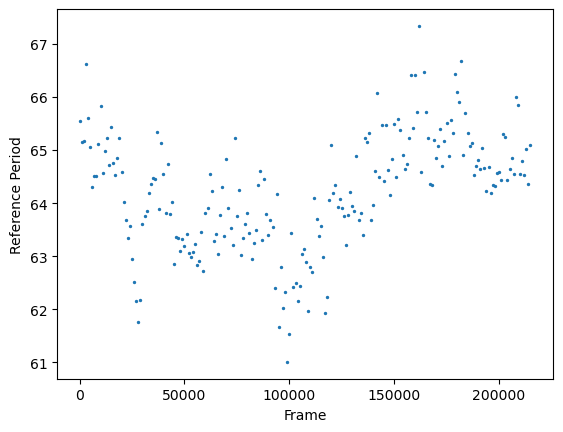

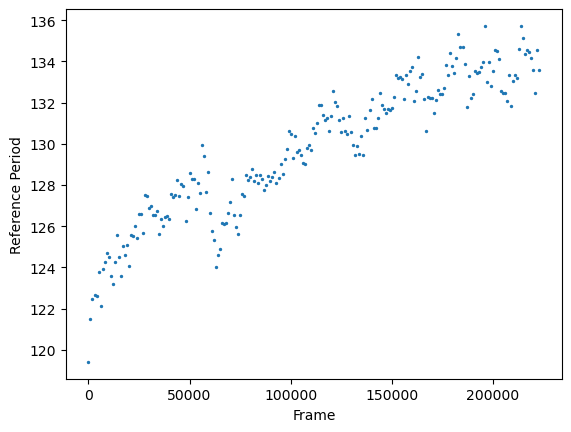

In [44]:
periods_caf1 = []
for oog_caf1 in oogs_caf1:
    periods_caf1.append(oog_caf1.sequence_manager.reference_period)

periods_caf2 = []
for oog_caf2 in oogs_caf2:
    periods_caf2.append(oog_caf2.sequence_manager.reference_period)

plt.scatter(np.arange(len(periods_caf1)) * 1000, periods_caf1, s = 2)
plt.xlabel("Frame")
plt.ylabel("Reference Period")
plt.show()
plt.scatter(np.arange(len(periods_caf2)) * 1000, periods_caf2, s = 2)
plt.xlabel("Frame")
plt.ylabel("Reference Period")
plt.show()

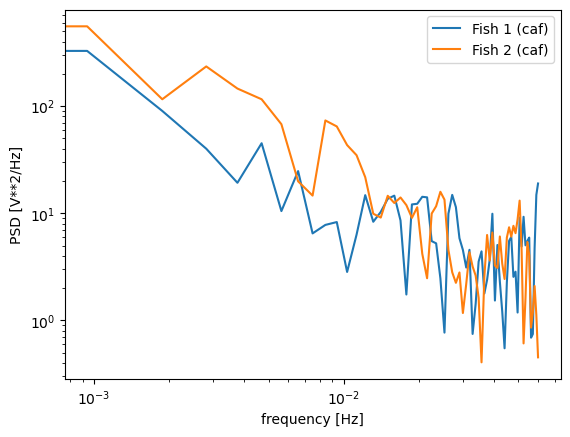

In [47]:
from scipy import signal
f, Pxx = signal.welch(periods_caf1, fs=1/(1000/120), nperseg = 128)
plt.semilogy(f, Pxx, label = "Fish 1 (caf)")
f, Pxx = signal.welch(periods_caf2, fs=1/(1000/120), nperseg = 128)
plt.semilogy(f, Pxx, label = "Fish 2 (caf)")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xscale("log")
plt.legend()
plt.show()